<h1 align=center><font size = 5>Ben's Assignment - Data Analysis with Python</font></h1>
<h2 align=center><font size = 5>House Sales in King County, USA</font></h2>

## Introduction

In this assignment, I will analyse and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors and so on. 

Import Primary Modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

#### Importing the **Data**

Load the CSV file:

In [2]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

Using head method display the first 5 columns of the dataframe.

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<b>Q1) Display the data types of each column using the attribute dtype</b>

In [4]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


<b>Q 2  Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data.</b>

In [5]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<b>Question 3 use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.</b>

In [7]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

**Question 4 use the function boxplot in the seaborn library**

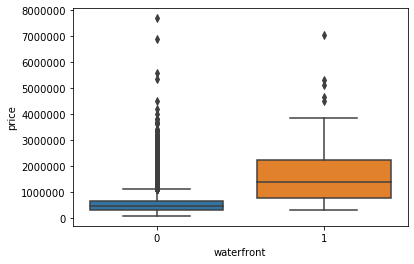

In [8]:
sns.boxplot(x="waterfront", y="price", data=df)

<b>Question 4 Use the function regplot in the seaborn library</b>

(0, 8086166.702848644)

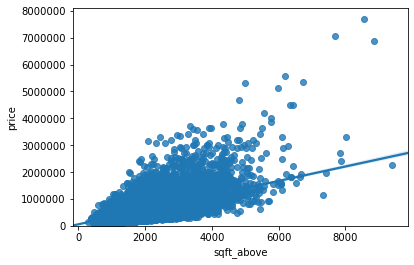

In [9]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)

<b>Fit a linear regression model to predict the price using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.</b>

In [11]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [12]:
Y = df['price']
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

**Q) Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.**

In [28]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [20]:
lm = LinearRegression()
lm

X = df[['floors']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)

0.06594310068341092

In [21]:
lm = LinearRegression()
lm

X = df[['waterfront']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)

0.07095267538578309

In [22]:
lm = LinearRegression()
lm

X = df[['lat']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)

0.09425113672917462

In [ ]:
lm = LinearRegression()
lm

X = df[['bedrooms']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)

In [30]:
lm = LinearRegression()
lm

X = df[['sqft_basement']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)

0.104856815269744

In [32]:
lm = LinearRegression()
lm

X = df[['view']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)

0.15784211584121532

In [ ]:
lm = LinearRegression()
lm

X = df[['bathrooms']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)

In [34]:
lm = LinearRegression()
lm

X = df[['sqft_living15']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)

0.3426684607560172

In [35]:
lm = LinearRegression()
lm

X = df[['sqft_above']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)

0.36671175283827917

In [36]:
lm = LinearRegression()
lm

X = df[['grade']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)

0.4454684861092873

In [37]:
lm = LinearRegression()
lm

X = df[['sqft_living']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)

0.49285321790379316

In [14]:
y_data = df['price']
x_data=df.drop('price',axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
lre=LinearRegression()
lre.fit(x_train[['sqft_living']], y_train)
lre.score(x_test[['sqft_living']], y_test)

number of test samples : 3242
number of training samples: 18371


0.4910058627910613

***Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2.**

In [39]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [40]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [42]:
pipe.score(X,Y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.5327430940591443

***Other Steps**

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [44]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features ]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3242
number of training samples: 18371


In [49]:
from sklearn.linear_model import Ridge

In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
x_test_pr=pr.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

In [ ]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)

In [ ]:
RidgeModel.score(x_train_pr, y_train)

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

***Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1.  Calculate the R^2 utilising the test data provided.**

In [54]:
from sklearn.preprocessing import PolynomialFeatures

pr=PolynomialFeatures(degree=2)
pr

In [ ]:
x_train_pr=pr.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

In [ ]:
x_polly=pr.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])


In [ ]:
RidgeModel=Ridge(alpha=0.1)

RidgeModel.fit(x_train_pr, y_train)

RidgeModel.score(x_train_pr, y_train)

In [ ]:
x_test_pr=pr.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

x_polly=pr.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

RidgeModel=Ridge(alpha=0.1)

RidgeModel.fit(x_test_pr, y_test)

RidgeModel.score(x_test_pr, y_test)

In [ ]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

Notice how when you zoom out all the way, all markers are grouped into one cluster, *the global cluster*, of 100 markers or crimes, which is the total number of crimes in our dataframe. Once you start zooming in, the *global cluster* will start breaking up into smaller clusters. Zooming in all the way will result in individual markers.

# Choropleth Maps <a id="8"></a>

A `Choropleth` map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area or it shows the level of variability within a region. Below is a `Choropleth` map of the US depicting the population by square mile per state.

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/2000_census_population_density_map_by_state.png" width = 600> 

Now, let's create our own `Choropleth` map of the world depicting immigration from various countries to Canada.

Let's first download and import our primary Canadian immigration dataset using *pandas* `read_excel()` method. Normally, before we can do that, we would need to download a module which *pandas* requires to read in excel files. This module is **xlrd**. For your convenience, we have pre-installed this module, so you would not have to worry about that. Otherwise, you would need to run the following line of code to install the **xlrd** module:
```
!conda install -c anaconda xlrd --yes
```

Download the dataset and read it into a *pandas* dataframe:

In [ ]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)

print('Data downloaded and read into a dataframe!')

Let's take a look at the first five items in our dataset.

In [ ]:
df_can.head()

Let's find out how many entries there are in our dataset.

In [ ]:
# print the dimensions of the dataframe
print(df_can.shape)

Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* notebooks for a detailed description of this preprocessing.

In [ ]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

Let's take a look at the first five items of our cleaned dataframe.

In [ ]:
df_can.head()

In order to create a `Choropleth` map, we need a GeoJSON file that defines the areas/boundaries of the state, county, or country that we are interested in. In our case, since we are endeavoring to create a world map, we want a GeoJSON that defines the boundaries of all world countries. For your convenience, we will be providing you with this file, so let's go ahead and download it. Let's name it **world_countries.json**.

In [ ]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

Now that we have the GeoJSON file, let's create a world map, centered around **[0, 0]** *latitude* and *longitude* values, with an intial zoom level of 2, and using *Mapbox Bright* style.

In [ ]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

And now to create a `Choropleth` map, we will use the *choropleth* method with the following main parameters:

1. geo_data, which is the GeoJSON file.
2. data, which is the dataframe containing the data.
3. columns, which represents the columns in the dataframe that will be used to create the `Choropleth` map.
4. key_on, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. To determine that, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the name of the countries, since the countries are our variable of interest. In this case, **name** is the key in the GeoJSON file that contains the name of the countries. Note that this key is case_sensitive, so you need to pass exactly as it exists in the GeoJSON file.

In [ ]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

As per our `Choropleth` map legend, the darker the color of a country and the closer the color to red, the higher the number of immigrants from that country. Accordingly, the highest immigration over the course of 33 years (from 1980 to 2013) was from China, India, and the Philippines, followed by Poland, Pakistan, and interestingly, the US.

Notice how the legend is displaying a negative boundary or threshold. Let's fix that by defining our own thresholds and starting with 0 instead of -6,918!

In [ ]:
world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

Much better now! Feel free to play around with the data and perhaps create `Choropleth` maps for individuals years, or perhaps decades, and see how they compare with the entire period from 1980 to 2013.

### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!

This notebook is part of a course on **Coursera** called *Data Visualization with Python*. If you accessed this notebook outside the course, you can take this course online by clicking [here](http://cocl.us/DV0101EN_Coursera_Week3_LAB2).

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).